In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
train_df = pd.read_csv('train.csv')

test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


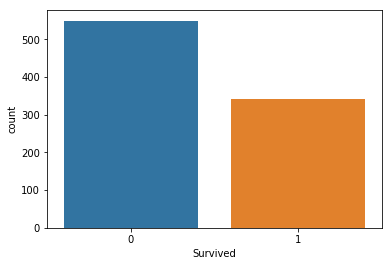

In [6]:
sns.countplot(x='Survived', data=train_df)

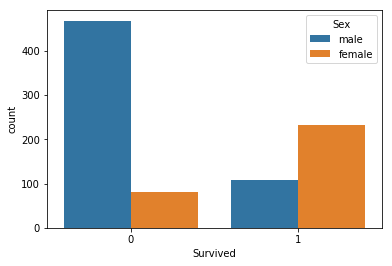

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

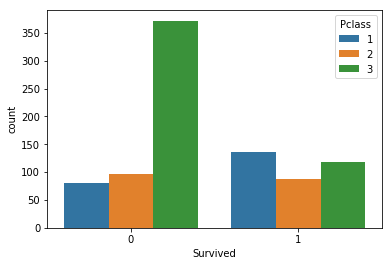

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)

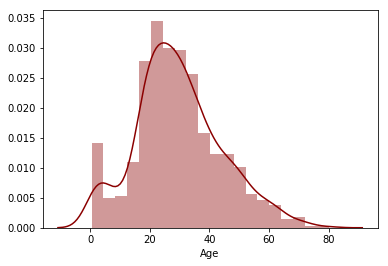

In [9]:
sns.distplot(train_df['Age'].dropna(), color='darkred')

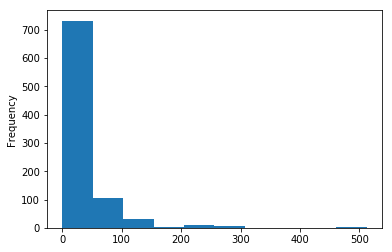

In [10]:
train_df['Fare'].plot(kind='hist')

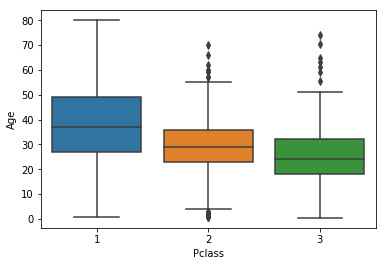

In [11]:
sns.boxplot(x='Pclass', y='Age', data=train_df)

In [0]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age) :
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else :
            return 24
        
    else :
        return Age

train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)
test_df['Age'] = test_df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [0]:
def impute_cabin(cols) :
    Cabin = cols[0]
    
    if type(Cabin) == str :
        return 1
    else :
        return 0
    
train_df['Cabin'] = train_df[['Cabin']].apply(impute_cabin, axis=1)
test_df['Cabin'] = test_df[['Cabin']].apply(impute_cabin, axis=1)

In [0]:
sex = pd.get_dummies(train_df['Sex'], drop_first=True)
embarks = pd.get_dummies(train_df['Embarked'], drop_first=True)

train_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train_df = pd.concat([train_df,sex,embarks], axis= 1)



sex_te = pd.get_dummies(test_df['Sex'], drop_first=True)
embarks_te = pd.get_dummies(test_df['Embarked'], drop_first=True)

test_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test_df = pd.concat([test_df,sex_te,embarks_te], axis= 1)

In [15]:
train_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [17]:
X_train = train_df.drop('Survived', axis = 1)
Y_train = train_df['Survived']
X_test = test_df
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [18]:
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)


In [0]:
pred = regressor.predict(X_test)

In [21]:
ans_df = pd.DataFrame()
ans_df['PassengerId'] = X_test['PassengerId']
ans_df['Survived'] = pred

ans_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
ans_df.to_csv('Predicted_result.csv', index = False)